<h1 align="center">Zewail University of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2018)</h2>
<h2 align="center">Lab 4: KNN (using scikit-learn)</h3>
<h3 align="center">11/10/2018</h3>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from lab4_functions import plot_iris_data
from lab4_functions import plot_knn_decision_boundaries

## Introduction to scikit-learn

https://towardsdatascience.com/hands-on-introduction-to-scikit-learn-sklearn-f3df652ff8f2 

http://scikit-learn.org/stable/documentation.html

## What is the Iris dataset?

##### Attributes:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

We will just use two features for easier visualization; sepal length and width.

##### class: 
* Iris Setosa 
* Iris Versicolour 
* Iris Virginica

<img src="Lab4_petal_sepal.png">
source: https://www.wpclipart.com/plants/diagrams/plant_parts/petal_sepal_label.png.html

### Load and Split Dataset

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import iris dataset
iris = datasets.load_iris()

# We would use only the first two features
X = iris.data[:, :2]
y = iris.target

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)

#split the train set further into train set and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

del X, y
print (f"training set size: {X_train.shape[0]} samples \
       \nvalidation set size: {X_val.shape[0]} samples\ntest set size: {X_test.shape[0]} samples")

training set size: 90 samples        
validation set size: 30 samples
test set size: 30 samples


### Preprocess Dataset

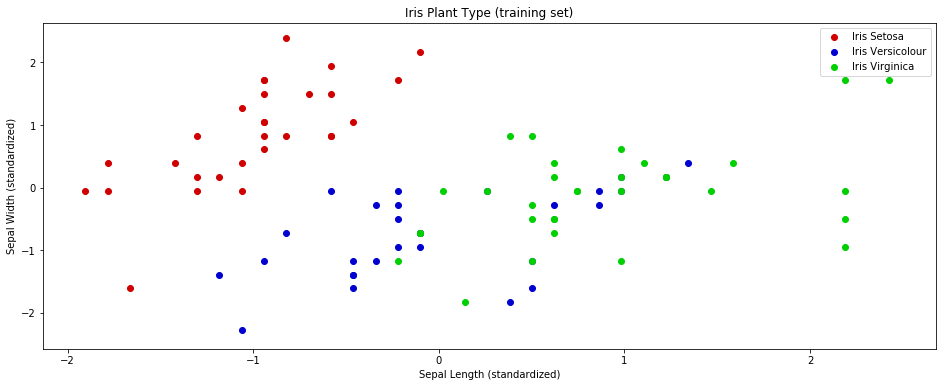

In [3]:
from sklearn.preprocessing import StandardScaler

#Standardize Dataset (substract training set mean and divide by training set standard deviation)
scaler = StandardScaler().fit(X_train) #the scaler is fitted to the training set (it gets the mean and std of the training set)
standardized_X_train = scaler.transform(X_train) #the scaler is applied to the training set
standardized_X_val = scaler.transform(X_val) #the scaler is applied to the validation set
standardized_X_test = scaler.transform(X_test) #the scaler is applied to the test set
del X_train, X_val, X_test

#plot the data
plot_iris_data(standardized_X_train, y_train)

## Train using scikit-learn KNeighborsClassifier 
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Neighborhood size (k) = 1, Training accuracy: 92.2%


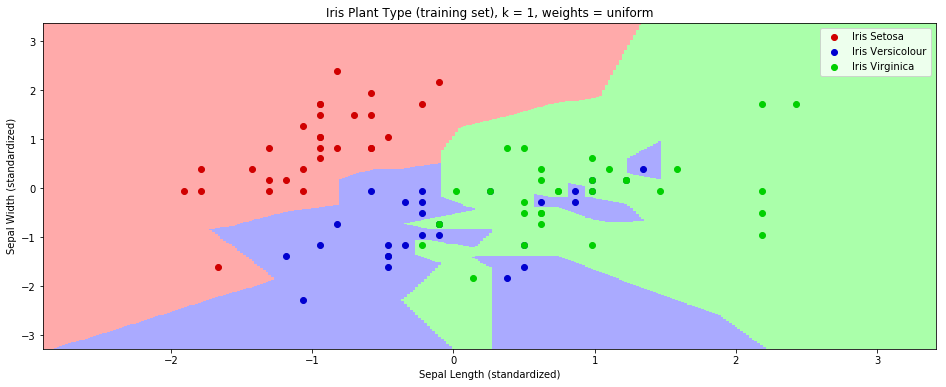

In [27]:
from sklearn.neighbors import KNeighborsClassifier

neighborhood_size = 1

classifier = KNeighborsClassifier(n_neighbors = neighborhood_size, weights = "uniform", algorithm = "brute")
classifier.fit(standardized_X_train, y_train)

train_accuracy = classifier.score(standardized_X_train, y_train)
print (f"Neighborhood size (k) = {neighborhood_size}, Training accuracy: {train_accuracy*100:.1f}%")

plot_knn_decision_boundaries(classifier, standardized_X_train, y_train, mesh_step = 0.02)

## Using distance adjusted weights instead of uniform (equal) weights

Neighborhood size (k) = 15, Training accuracy: 83.3%


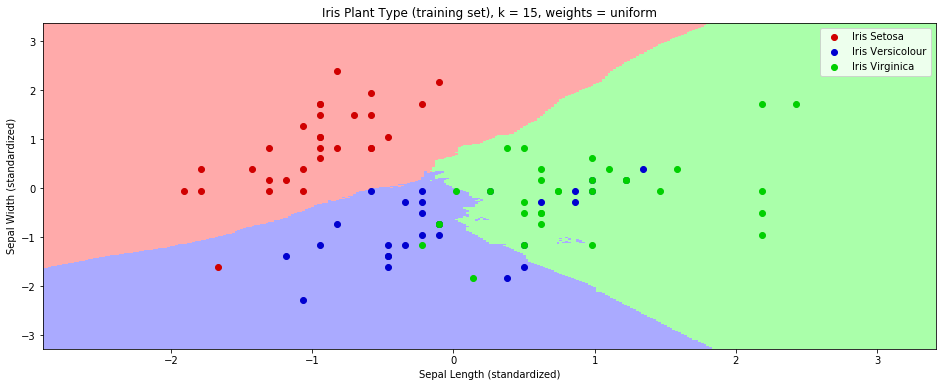

Neighborhood size (k) = 15, Training accuracy: 92.2%


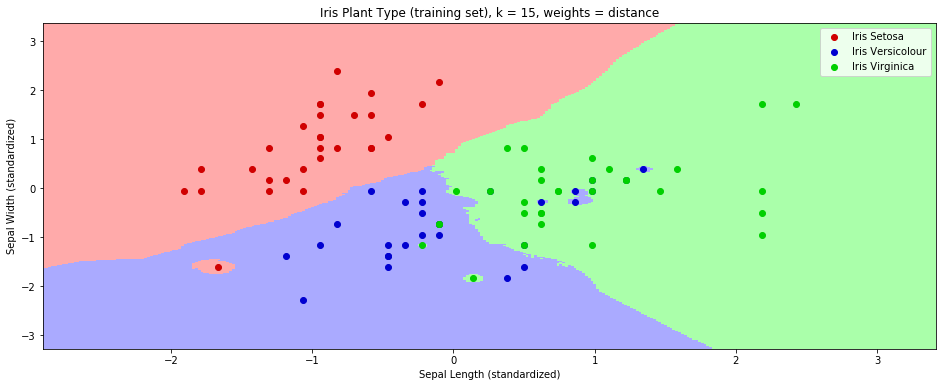

In [22]:
from sklearn.neighbors import KNeighborsClassifier

neighborhood_size = 15

classifier = KNeighborsClassifier(n_neighbors = neighborhood_size, weights = "uniform", algorithm = "brute")
classifier.fit(standardized_X_train, y_train)

train_accuracy = classifier.score(standardized_X_train, y_train)
print (f"Neighborhood size (k) = {neighborhood_size}, Training accuracy: {train_accuracy*100:.1f}%")

plot_knn_decision_boundaries(classifier, standardized_X_train, y_train, mesh_step = 0.02)

neighborhood_size = 15

classifier = KNeighborsClassifier(n_neighbors = neighborhood_size, weights = "distance", algorithm = "brute")
classifier.fit(standardized_X_train, y_train)

train_accuracy = classifier.score(standardized_X_train, y_train)
print (f"Neighborhood size (k) = {neighborhood_size}, Training accuracy: {train_accuracy*100:.1f}%")

plot_knn_decision_boundaries(classifier, standardized_X_train, y_train, mesh_step = 0.02)

## <font color = "#af00af"> Questions to think about:<font/>


## <font color = "#af00af"> 1) How are the decision boundaries in the previous cells drawn? <font/>


## <font color = "#af00af"> 2) What does KNeighborsClassifier().fit(X,y) does? <font/>


## <font color = "#af00af"> 3) Is KNN a linear classifier? <font/>


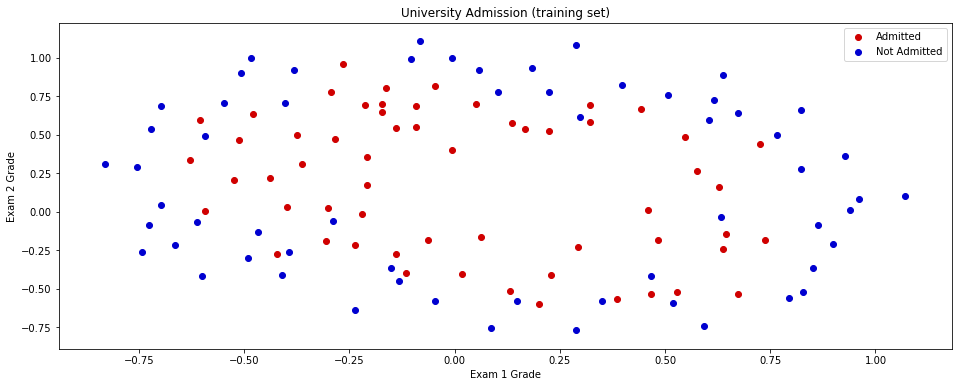

In [6]:
from lab3_functions import get_data
from lab3_functions import plot_university_data

#dataset from Andrew NG course
features, labels = get_data("lab3data2.txt")

plot_university_data(features, labels)

Neighborhood size (k) = 5, Training accuracy: 85.6%


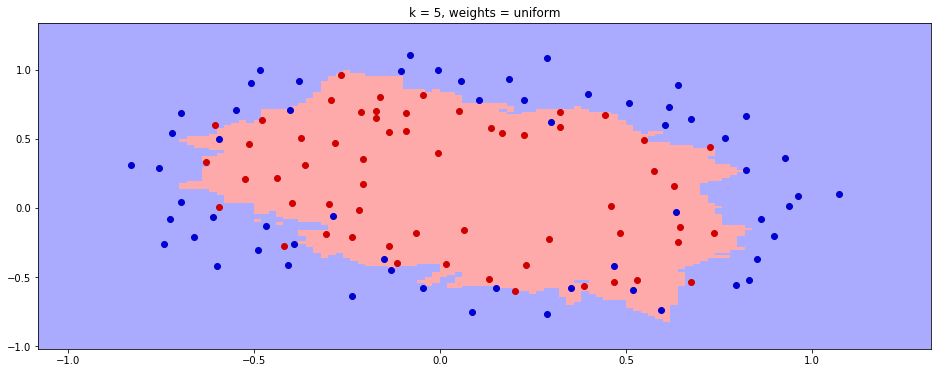

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from lab4_functions import plot_knn_decision_boundaries_

neighborhood_size = 5

classifier = KNeighborsClassifier(n_neighbors = neighborhood_size, weights = "uniform", algorithm = "auto")
classifier.fit(features, labels)

train_accuracy = classifier.score(features, labels)
print (f"Neighborhood size (k) = {neighborhood_size}, Training accuracy: {train_accuracy*100:.1f}%")

plot_knn_decision_boundaries_(classifier, features, labels, mesh_step = 0.02)

## <font color = "#af00af"> 4) What is the effect of data standardization on KNN performance? <font/>


<img src="Lab4_no_normalization.png">
<img src="Lab4_normalization.png">
source: https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn/287439

## <font color = "#af00af"> 5) What if we set the neighborhood size to be the size of the data? <font/>


Neighborhood size (k) = 90, Training accuracy: 35.6%


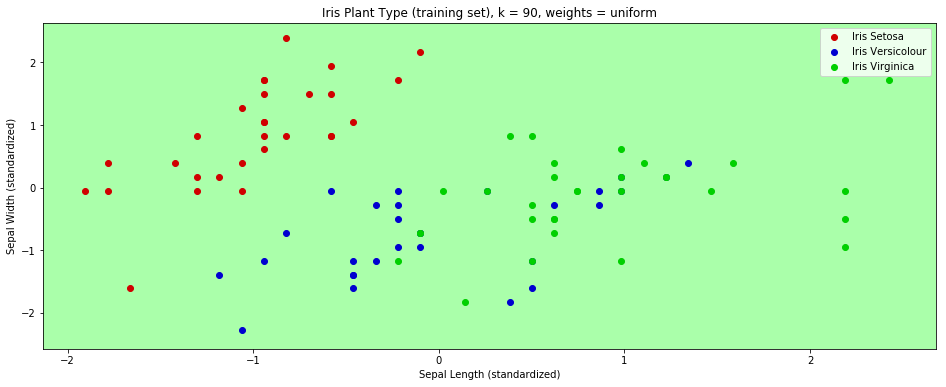

In [23]:
from sklearn.neighbors import KNeighborsClassifier

neighborhood_size = standardized_X_train.shape[0]

classifier = KNeighborsClassifier(n_neighbors = neighborhood_size, weights = "uniform", algorithm = "auto")
classifier.fit(standardized_X_train, y_train)

train_accuracy = classifier.score(standardized_X_train, y_train)
print (f"Neighborhood size (k) = {neighborhood_size}, Training accuracy: {train_accuracy*100:.1f}%")

plot_knn_decision_boundaries(classifier, standardized_X_train, y_train, mesh_step = 0.02)

## <font color = "#af00af"> 6) Is KNN time efficient? <font/>


classifier = KNeighborsClassifier(n_neighbors = neighborhood_size, weights = "uniform", <b>algorithm = "auto"<b/>) 

see http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms 

and https://www.youtube.com/watch?v=TLxWtXEbtFE

## Use the validation set to get the best k, and weither weights should be uniform or distance based

#### <font color="#ef0000"> Write your code here: <font/>
<font color="#ef0000"> Modify the following code to get the neighborhood size that gives the best performance on the validation set <font/>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1,20,2):
    neighborhood_size = k

    classifier = KNeighborsClassifier(n_neighbors = neighborhood_size, weights = "uniform", algorithm = "auto")
    classifier.fit(standardized_X_train, y_train)
    
    train_accuracy = classifier.score(standardized_X_train, y_train)
    print (f"Neighborhood size (k) = {neighborhood_size}, Training accuracy: {train_accuracy*100:.1f}%")

    plot_knn_decision_boundaries(classifier, standardized_X_train, y_train, mesh_step = 0.02)